In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
df = pd.read_csv('dataset/01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


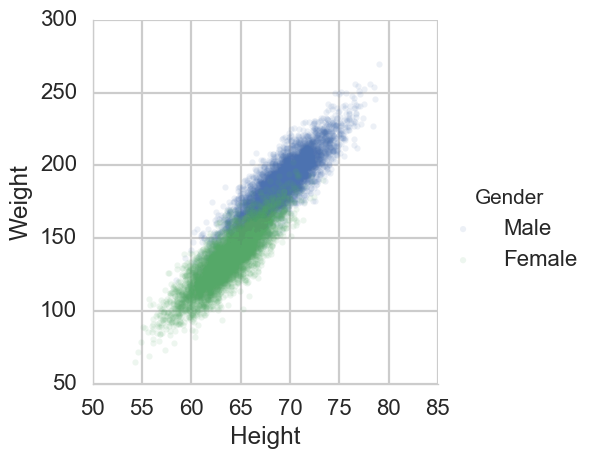

In [3]:
sns.lmplot(x = 'Height', y = 'Weight', data = df, hue = 'Gender', scatter_kws={'alpha': 0.1}, fit_reg = False)

## Classification Using Logistic Regression

#### 1. Evaluation with self built cross validation

In [4]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, X, y, score_func = accuracy_score):
    result = 0
    n_fold = 5
    for train, valid in KFold(y.size, n_fold):
        clf.fit(X[train], y[train])
        pred = clf.predict(X[valid])
        result += score_func(pred, y[valid])
    return result / n_fold

In [5]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[['Height', 'Weight']].values, df.Gender.values)

In [6]:
from sklearn import linear_model

In [7]:
para = [0.001, 0.1, 1, 10, 100]
max_numb = 0
for c in para:
    clf = linear_model.LogisticRegression(C = c)
    result = cv_score(clf, xtrain, ytrain)
    print(result, c)
    
    if (result > max_numb):
        max_numb = result
        best = c
print('###################')
print(max_numb, best)

0.9184 0.001
0.918666666667 0.1
0.918666666667 1
0.918666666667 10
0.918666666667 100
###################
0.918666666667 0.1


In [8]:
clf = linear_model.LogisticRegression(C = best)
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
accuracy_score(pred, ytest)

0.92200000000000004

#### 2. Evaluation with sklearn.GridSearchCV

In [9]:
from sklearn.grid_search import GridSearchCV
clf = linear_model.LogisticRegression()
para = {'C': [0.001, 0.1, 1, 10, 100]}
fit = GridSearchCV(clf, param_grid=para, scoring = 'accuracy', cv=5)
fit.fit(xtrain, ytrain)

print(fit.best_estimator_)
print(fit.best_score_, fit.best_params_, fit.grid_scores_)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.918533333333 {'C': 0.1} [mean: 0.91827, std: 0.00609, params: {'C': 0.001}, mean: 0.91853, std: 0.00639, params: {'C': 0.1}, mean: 0.91853, std: 0.00639, params: {'C': 1}, mean: 0.91853, std: 0.00639, params: {'C': 10}, mean: 0.91853, std: 0.00639, params: {'C': 100}]


In [10]:
clfl2=linear_model.LogisticRegression(C=fit.best_params_['C'])
clfl2.fit(xtrain, ytrain)
ypred2=clfl2.predict(xtest)
accuracy_score(ypred2, ytest)

0.92200000000000004

## Cash vs. Check Classification

In [11]:
data = np.load('dataset/imag.pix.npy')
y = np.load('dataset/imag.lbl.npy')
STANDARD_SIZE = (322, 137)

In [12]:
data.shape, y.shape

((87, 132342), (87,))

In [80]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    
    # Slice Array into 3 equal parts and add them to different color channels
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape(STANDARD_SIZE[1], STANDARD_SIZE[0])
    rgbArray[..., 1] = b.reshape(STANDARD_SIZE[1], STANDARD_SIZE[0])
    rgbArray[..., 2] = g.reshape(STANDARD_SIZE[1], STANDARD_SIZE[0])
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

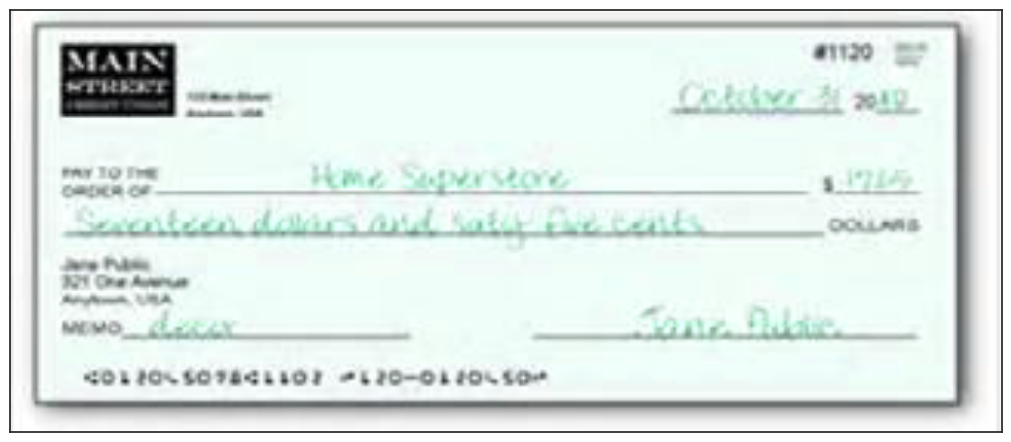

In [81]:
display_image(data[7])

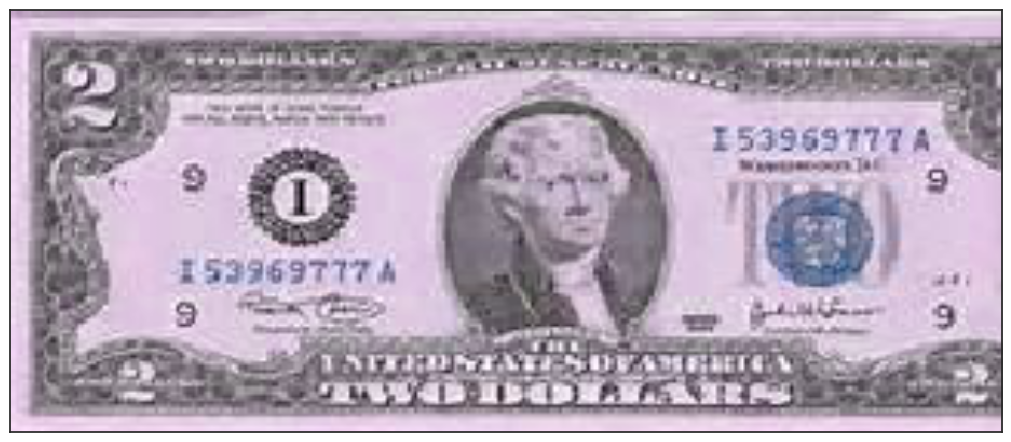

In [82]:
display_image(data[60])

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X = pca.fit_transform(data)

In [84]:
print(pca.explained_variance_ratio_.sum())

0.861160301258


In [85]:
pca.explained_variance_ratio_.shape

(40,)

In [90]:
df = pd.DataFrame(
    {'y': y, 
     'label': np.where(y == 1, 'check', 'dollar')})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df['pc%i' %(i+1)] = X[:,i]
    
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,check,1,-22536.362571,2428.343967,2133.777242,-328.322450,1065.239885,-79.779510,425.028862,-622.482412,2490.207981,858.586365,-1072.565326,277.135956,-1117.008245,712.921050,-787.542306,414.930152,-195.835369,472.439595,-429.687952,609.645649,-588.997035,-266.805059,987.770869,-953.085804,1037.093164,-568.689960,-42.940841,-112.654017,520.389800,545.386992,-643.325633,-77.820997,-733.674370,1263.879103,586.756998,119.593373,-508.370089,-294.174840,-252.519347,-51.538313
1,check,1,-22226.658684,709.255778,288.826225,-1300.635376,792.084752,-217.442930,-1076.777444,2115.106737,875.462523,1124.846524,-343.234147,-43.368372,547.937212,357.548885,-1761.499582,-372.120164,813.766003,293.993188,-941.050102,-154.191592,-1122.863363,507.700410,815.875978,-717.999469,289.149370,115.870070,816.665466,1144.817760,359.342436,120.101878,-851.744626,-582.296067,316.394094,176.118549,673.219112,657.451216,94.661336,192.333834,-142.834165,376.042041
2,check,1,-17364.260784,4252.027148,-793.802239,-1362.054543,374.230509,-3142.098137,-2514.239438,-1443.845989,121.012593,419.751003,-2083.156756,1717.655662,-723.242074,-1240.426110,-310.766668,-1059.408079,1385.595045,-799.959051,-2598.756819,880.676052,3384.434883,-389.628097,3414.296511,-1340.080791,-4755.217740,-1036.255043,2198.383527,-687.340263,-1379.299146,-2148.507251,-644.565929,-1683.784601,1774.957382,-3132.874465,861.445428,-2247.593057,3105.529724,-3040.391807,843.107937,-277.652726
3,check,1,-22847.256199,900.591903,-577.203148,-180.315540,733.144739,107.929873,-1441.787045,1069.822194,-844.816567,1390.008267,1470.750252,-723.940456,-578.786597,-259.303433,932.522873,170.963935,-301.561034,871.589461,-180.217083,-1238.130123,557.669686,-174.747087,332.949651,370.770361,-934.637134,-180.894557,1318.174882,92.860081,273.711601,-464.485412,-167.088608,70.342765,101.594998,834.492608,195.240356,-635.616322,-394.941809,-336.312866,130.697946,352.956334
4,check,1,-15868.672595,-3259.491423,-506.800796,-919.635265,-2166.553649,981.628130,1669.697325,391.328228,-1735.708244,-163.565703,-1626.848455,-556.071285,-863.023076,1721.533650,944.390131,-1133.831269,2139.645031,766.969676,-1093.378106,-602.035479,-28.726067,83.689740,505.980050,-1106.373987,332.008248,1227.814307,-708.139610,-713.030110,142.707832,-912.989078,1012.271645,3623.483860,2107.208639,-3363.795948,966.429469,2141.451996,-1849.211068,-2139.553978,2546.960143,472.873126


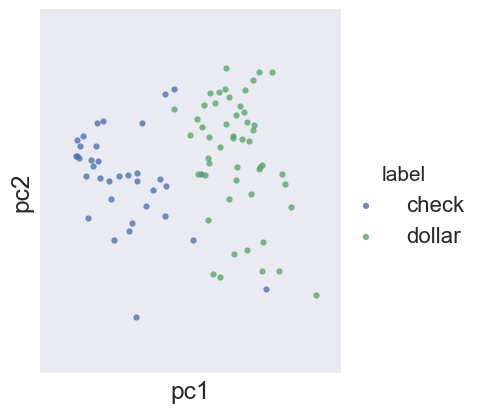

In [91]:
with sns.axes_style('darkgrid'):
    sns.lmplot(x='pc1', y='pc2', hue='label', fit_reg=False, data=df)
    plt.xticks([],[])
    plt.yticks([],[])

In [95]:
len(pca.components_[0])

132342

## Define Function to plot PCA Components

In [139]:
def normal(numb):
    numb = (numb - numb.min())/(numb.max() - numb.min())
    numb = numb*256
    return np.round(numb)

def Transfer_rgb(pca, i):
    r = pca.components_[i][0:len(pca.components_[i]):3]
    g = pca.components_[i][1:len(pca.components_[i]):3]
    b = pca.components_[i][2:len(pca.components_[i]):3]
    
    r = normal(r)
    g = normal(g)
    b = normal(b)
    return r, g, b

def display_pca(pca, i):
    r, g, b = Transfer_rgb(pca, i)
    dis_arr = np.zeros((137, 322, 3), 'uint8')
    dis_arr[..., 0] = r.reshape(137, 322)
    dis_arr[..., 1] = g.reshape(137, 322)
    dis_arr[..., 2] = b.reshape(137, 322)
    with sns.axes_style('white'):
        plt.imshow(dis_arr)
        plt.xticks([])
        plt.yticks([])

In [154]:
def display_pca_mean(pca):
    start = np.round(pca.mean_)
    r = start[0:len(pca.mean_):3]
    g = start[1:len(pca.mean_):3]
    b = start[2:len(pca.mean_):3]
    
    display_arr = np.zeros((137, 322, 3), 'uint8')
    display_arr[..., 0] = r.reshape(137,322)
    display_arr[..., 1] = g.reshape(137,322)
    display_arr[..., 2] = b.reshape(137,322)
    
    plt.imshow(display_arr)
    plt.xticks([])
    plt.yticks([])
        

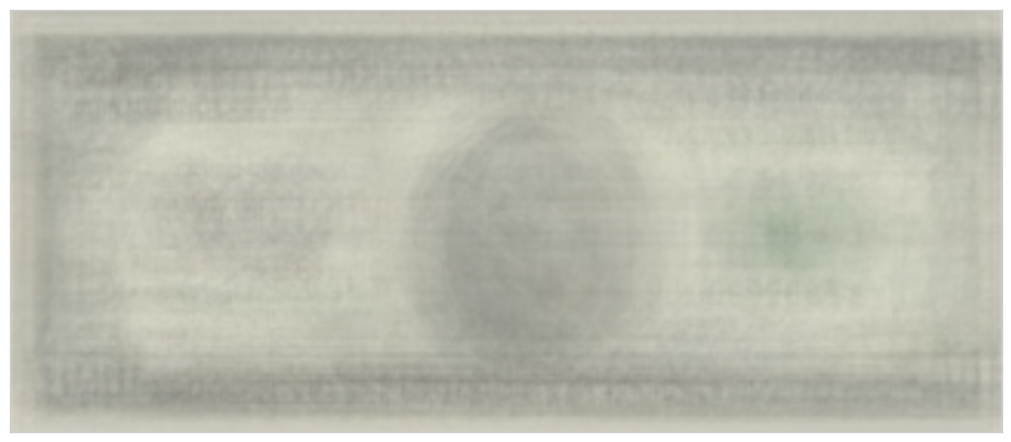

In [155]:
display_pca_mean(pca)

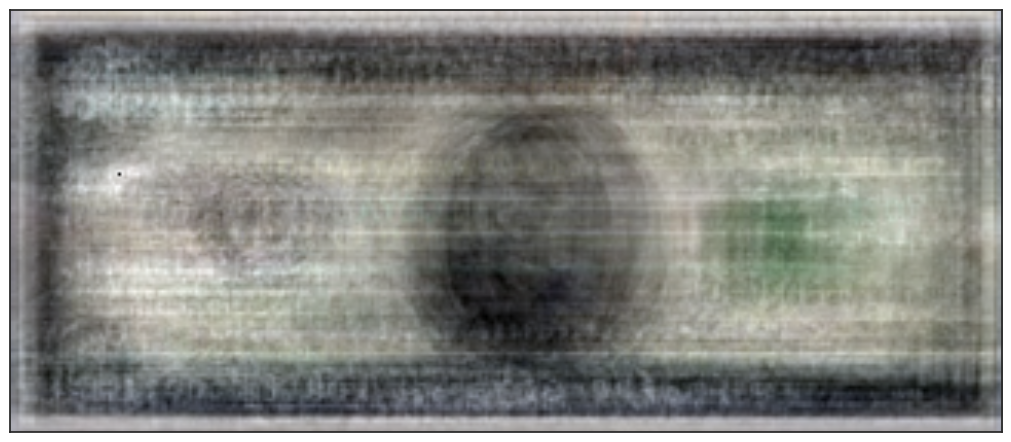

In [140]:
display_pca(pca, 0)

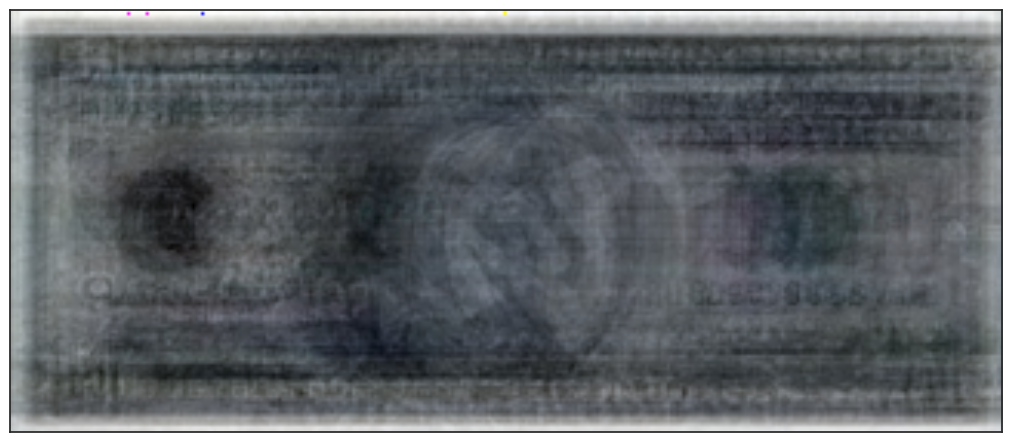

In [142]:
display_pca(pca, 1)

## Plot PCA Performance (Coloring Each Points with Actual Label)

check
87
36
dollar
87
51


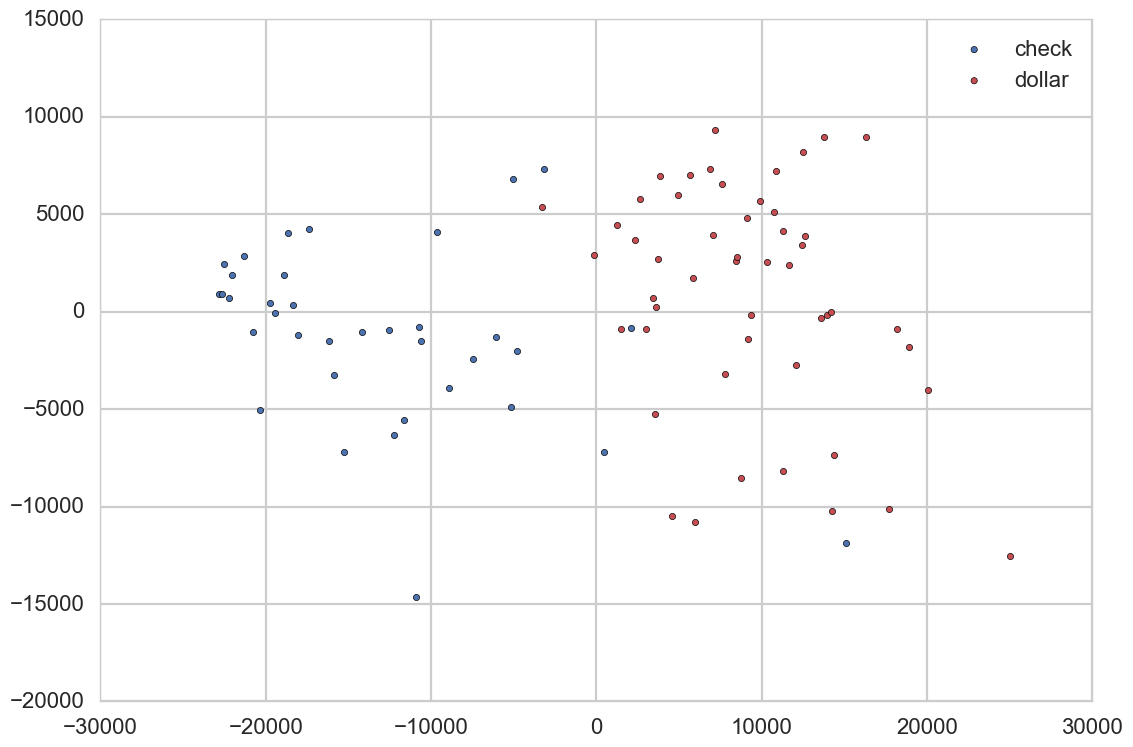

In [180]:
colors = [sns.color_palette()[0], sns.color_palette()[2]]
for label, color in zip(df.label.unique(), colors):
    print(label)
    masks = df.label == label
    print(len(masks))
    print(len(df[masks]))
    
    plt.scatter(df[masks]['pc1'], df[masks]['pc2'], c = color, label = label)
plt.legend()
    

In [338]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys = df.y
subdf = df[['pc1', 'pc2']]
subdfstd = (subdf - subdf.mean()) / subdf.std()

def knn_classify(X, y, nbrs, plot = True, train_size = 0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size, random_state = 66)
    clf = KNeighborsClassifier(nbrs)
    clf.fit(Xtrain, ytrain)
    
    train_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    
    if plot:
        print('Accuracy on training set is: %0.2f%%' %(train_accuracy*100))
        print('Accuracy on test set is: %0.2f%%' %(test_accuracy*100))
        
        #plt.points_plot(Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, train_accuracy, test_accuracy

In [339]:
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,check,1,-22536.362571,2428.343967,2133.777242,-328.322450,1065.239885,-79.779510,425.028862,-622.482412,2490.207981,858.586365,-1072.565326,277.135956,-1117.008245,712.921050,-787.542306,414.930152,-195.835369,472.439595,-429.687952,609.645649,-588.997035,-266.805059,987.770869,-953.085804,1037.093164,-568.689960,-42.940841,-112.654017,520.389800,545.386992,-643.325633,-77.820997,-733.674370,1263.879103,586.756998,119.593373,-508.370089,-294.174840,-252.519347,-51.538313
1,check,1,-22226.658684,709.255778,288.826225,-1300.635376,792.084752,-217.442930,-1076.777444,2115.106737,875.462523,1124.846524,-343.234147,-43.368372,547.937212,357.548885,-1761.499582,-372.120164,813.766003,293.993188,-941.050102,-154.191592,-1122.863363,507.700410,815.875978,-717.999469,289.149370,115.870070,816.665466,1144.817760,359.342436,120.101878,-851.744626,-582.296067,316.394094,176.118549,673.219112,657.451216,94.661336,192.333834,-142.834165,376.042041
2,check,1,-17364.260784,4252.027148,-793.802239,-1362.054543,374.230509,-3142.098137,-2514.239438,-1443.845989,121.012593,419.751003,-2083.156756,1717.655662,-723.242074,-1240.426110,-310.766668,-1059.408079,1385.595045,-799.959051,-2598.756819,880.676052,3384.434883,-389.628097,3414.296511,-1340.080791,-4755.217740,-1036.255043,2198.383527,-687.340263,-1379.299146,-2148.507251,-644.565929,-1683.784601,1774.957382,-3132.874465,861.445428,-2247.593057,3105.529724,-3040.391807,843.107937,-277.652726
3,check,1,-22847.256199,900.591903,-577.203148,-180.315540,733.144739,107.929873,-1441.787045,1069.822194,-844.816567,1390.008267,1470.750252,-723.940456,-578.786597,-259.303433,932.522873,170.963935,-301.561034,871.589461,-180.217083,-1238.130123,557.669686,-174.747087,332.949651,370.770361,-934.637134,-180.894557,1318.174882,92.860081,273.711601,-464.485412,-167.088608,70.342765,101.594998,834.492608,195.240356,-635.616322,-394.941809,-336.312866,130.697946,352.956334
4,check,1,-15868.672595,-3259.491423,-506.800796,-919.635265,-2166.553649,981.628130,1669.697325,391.328228,-1735.708244,-163.565703,-1626.848455,-556.071285,-863.023076,1721.533650,944.390131,-1133.831269,2139.645031,766.969676,-1093.378106,-602.035479,-28.726067,83.689740,505.980050,-1106.373987,332.008248,1227.814307,-708.139610,-713.030110,142.707832,-912.989078,1012.271645,3623.483860,2107.208639,-3363.795948,966.429469,2141.451996,-1849.211068,-2139.553978,2546.960143,472.873126


In [340]:
Xtrain, Xtest, ytrain, ytest = train_test_split(subdfstd.values, ys, train_size = 0.6)

In [341]:
knn_classify(subdfstd, ys, 1)

Accuracy on training set is: 100.00%
Accuracy on test set is: 88.57%


(1, 1.0, 0.88571428571428568)

## Some Testing Code (Not Yet Finished)

In [246]:
Xtrain, Xtest, ytrain, ytest = train_test_split(subdfstd, ys, train_size = 0.6, random_state = 66)
clf = KNeighborsClassifier(1)
clf.fit(Xtrain, ytrain)
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [293]:
xx, yy = np.meshgrid(np.linspace(2,3,3),np.linspace(0,1,3))
len(xx), len(yy)

(3, 3)

In [267]:
xx.ravel(), yy.ravel()

(array([ 2. ,  2.5,  3. ,  2. ,  2.5,  3. ,  2. ,  2.5,  3. ]),
 array([ 0. ,  0. ,  0. ,  0.5,  0.5,  0.5,  1. ,  1. ,  1. ]))

In [304]:
ZZ = clf.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = np.array([1, 0, 1, 0, 0, 1, 0, 0, 1])
ZZ = ZZ.reshape(xx.shape)

In [291]:
print(len(xx), len(yy), len(ZZ))

3 3 9


In [263]:
xx.shape
xx

array([[ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ],
       [ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ],
       [ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ],
       ..., 
       [ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ],
       [ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ],
       [ 2.        ,  2.01010101,  2.02020202, ...,  2.97979798,
         2.98989899,  3.        ]])

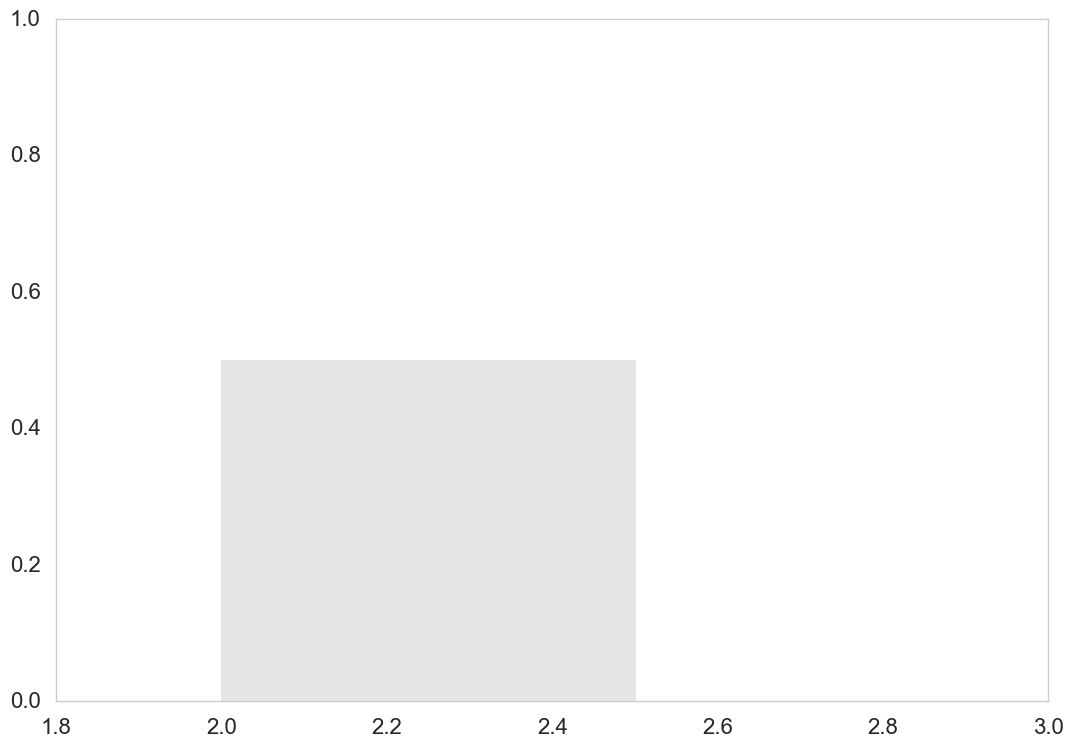

In [305]:
from matplotlib.colors import ListedColormap
plt.pcolormesh(xx, yy, ZZ, alpha=0.1)

In [335]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(len(Z))
    ZZ = Z.reshape(xx.shape)
    print(xx.shape)

        
    print(len(xx), len(yy), len(ZZ))
    plt.pcolormesh(xx, yy, ZZ, alpha = 0.2)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    plt.scatter(Xtr.values[:,0], Xtr.values[:,1], c=ytr)
    #sns.lmplot(x = 'pc1', y = 'pc2', hue='label', data = df)

10000
(100, 100)
100 100 100


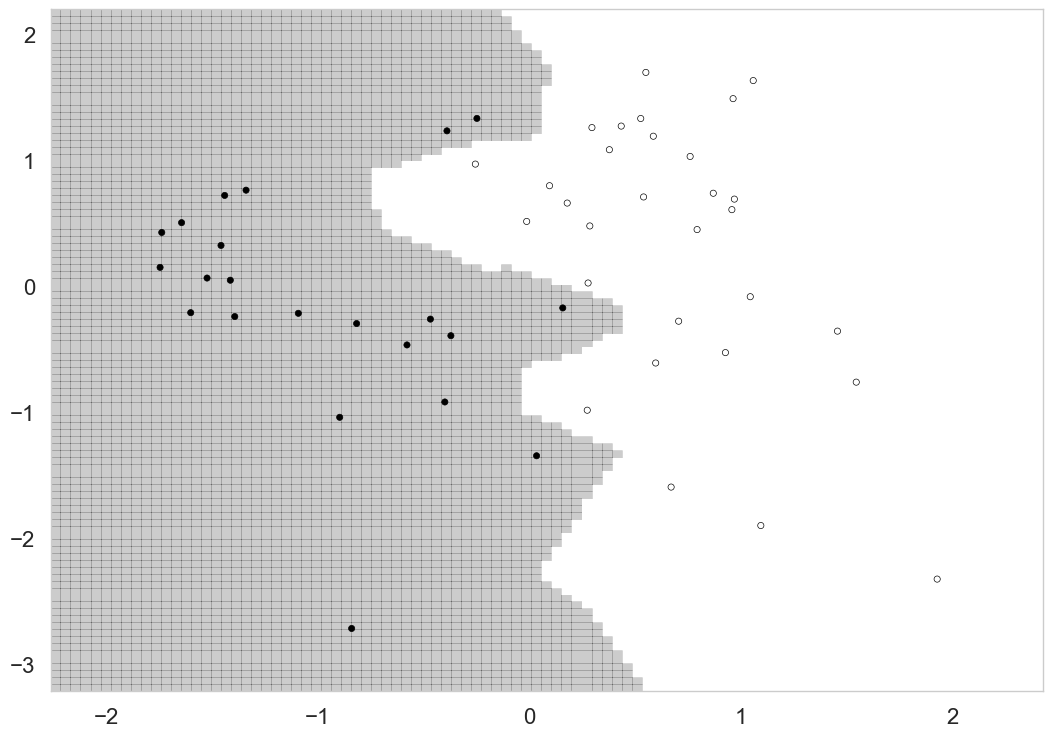

In [336]:
points_plot(Xtrain, Xtest, ytrain, ytest, clf, alpha =0.3)

In [328]:
plt.scatter?